In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Parámetros cosmológicos

In [2]:
neff0=3.04 # número efectivo de especies relativista
h=.6736 #H0/100 km/s/Mpc
om_bar0=0.051 #parámetro de densidad bariónico a z=0
om_dm0=0.264 #parámetro de densidad de materia oscura a z=0
om_lam0=0.68 #parámetro de densidad de constante cosmológica a z=0
om_rad0=9.237e-05 #parámetro de densidad de radiación a z=0

print(om_bar0+om_dm0)
c=299792 #km/s #velocidad de la luz
kmtoMpc=3.2408e-20 #factor de conversión de km a Mpc
H0=h*100
H0s=(H0)*kmtoMpc
c_over_H0=c*kmtoMpc/H0s #c/H0
c_over_H0

0.315


4450.593824228029

Definimos la ecuación de Friedmann para un Universo plano con materia oscura, materia bariónica, radiación y constante cosmológica (modelo estándar)

\begin{equation}
H^2=\frac{8 \pi G}{3}\left(\rho_{DM} + \rho_{b} + \rho_{r} + \rho_{\Lambda} \right),
\label{eq:FC}
\end{equation}


\begin{eqnarray}
{\dot\rho_{DM}}& + &3\,H \rho_{DM}=0,\\
{\dot\rho_{b}}& + &3\,H \rho_{b}=0,\\
{\dot\rho_{r}}& + &4\,H \rho_{r}=0,\\
{\dot\rho_{\Lambda}}&=&0.
\end{eqnarray}

Si no consideramos neutrinos, la Ec. de Friedmann en término de los parámetros de densidad y redshift

\begin{equation}
H^2=H_{0}^{2}\left[\Omega_{DM0}(1+z)^3 + \Omega_{b0}(1+z)^3 + \Omega_{r0}(1+z)^4+ \Omega_{\Lambda} \right]
\end{equation}

Podemos usar la condición de planitud para $\Omega_{\Lambda}=1-\Omega_{DM0}-\Omega_{b0}-\Omega_{r0}$

Distancia comóvil
\begin{equation}
D_{C}(z)=D_{H}\int^{0}_{z}\frac{dz^{\prime}}{E(z^{\prime})}
\end{equation}

Distancias de diámetro angular
\begin{equation}
D_{A}(z)=\frac{D_{H}}{1+z}\int^{0}_{z}\frac{dz^{\prime}}{E(z^{\prime})}
\end{equation}

\begin{equation}
D_{A}(z_1,z_2)=\frac{D_{H}}{1+z_2}\int^{z2}_{z1}\frac{dz}{E(z)}
\end{equation}

Modelos cosmologicos

In [3]:
def HzLCDMmodel(z,*param):
    H0=100*param[0]
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(param[1]+param[2])*z13
    ORAD=param[3]*z14
    ODE=1.0-param[1]-param[2]-param[3]
    x=np.sqrt(OMAT +ORAD + ODE)
    return x*H0

Npar=4
parlcdm=np.zeros(Npar)
parlcdm[0]=h
parlcdm[1]=om_bar0
parlcdm[2]=om_dm0
parlcdm[3]=om_rad0

In [8]:
# LCDM


def Ezmodel(z,*param):
    #H0=100*param[0]
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(param[1]+param[2])*z13
    ORAD=param[3]*z14
    ODE=1.0-param[1]-param[2]-param[3]
    x=np.sqrt(OMAT +ORAD + ODE)
    return x


Npar=4
par=np.zeros(Npar)
par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0

In [94]:
# wCDM
w=-1.2 #param[4]
Npar=5

def Ezmodel(z,*param):
    " param[0]->h"
    " param[1]->Om_bar"
    #H0=100*param[0]
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(param[1]+param[2])*z13
    ORAD=param[3]*z14
    ODE=1.0-param[1]-param[2]-param[3]
    fde=np.power(z1,3+param[4])
    x=np.sqrt(OMAT +ORAD +ODE*fde)
    return x

def Hzmodel(z,*param):
    H0=100*param[0]
    return H0*Ezmodel(z,*param)

par=np.zeros(Npar)
par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0
par[4]=w

In [99]:
# CPL

Npar=6
w0=-0.82 #param[4]
w1=-1.5 #param[5]

def Ezmodel(z,*param):
    #if namemodel='LCDM'
    #H0=100*param[0]
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(param[1]+param[2])*z13
    ORAD=param[3]*z14
    ODE=1.0-param[1]-param[2]-param[3]
    fde=np.power(z1,3+param[4]+param[5])*np.exp(-3*param[5]*z/z1)
    x=np.sqrt(OMAT +ORAD +ODE*fde)
    return x




par=np.zeros(Npar)
par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0
par[4]=w0
par[5]=w1

In [96]:
# JBP
w0=-0.70 #param[4]
w1=-4.4 #param[5]
Npar=6

def Ezmodel(z,*param):
    H0=100*param[0]
    z1=1.0+z
    z12=np.power(z1,2.)
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(param[1]+param[2])*z13
    ORAD=param[3]*z14
    ODE=1.0-param[1]-param[2]-param[3]
    fde=np.power(z1,3+param[4])*np.exp(1.5*param[5]*z*z/z12)
    x=np.sqrt(OMAT +ORAD +ODE*fde)
    return x

par=np.zeros(Npar)
par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0
par[4]=w0
par[5]=w1


In [97]:
# BA
w0=-0.78 #param[4]
w1=-3.24 #param[5]
Npar=6

def Ezmodel(z,*param):
    #H0=100*param[0]
    z1=1.0+z
    z12=np.power(z1,2.)
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(param[1]+param[2])*z13
    ORAD=param[3]*z14
    ODE=1.0-param[1]-param[2]-param[3]
    fde=np.power(z1,3+param[4])*np.power(1.+z**2,1.5*param[5])
    x=np.sqrt(OMAT +ORAD +ODE*fde)
    return x


par=np.zeros(Npar)
par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0
par[4]=w0
par[5]=w1

In [71]:
# Interactuacte
wx=-0.95 #param[4]
delta=0.77 #param[5]
Npar=6

def Ezmodel(z,*param):
    H0=100*param[0]
    z1=1.0+z
    z13w=np.power(z1,3.*(1.0+param[4]))
    z14=np.power(z1,4.)
    OMAT0=param[1]+param[2]
    ORAD=param[3]*z14
    ODE=1.0-OMAT0-param[3]
    f1=OMAT0/(param[5]+3.*param[4])
    f2=param[5]*z13w + 3.0*param[4]*np.power(z1,3.-param[5])
    x=np.sqrt(ORAD +ODE*z13w+ f1*f2 )
    return x


par=np.zeros(Npar)
par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0
par[4]=wx
par[5]=delta

In [98]:
# Cardassiano
n=-0.19 #param[4]
Npar=5

def Ezmodel(z,*param):
    print('par4',param[4])
    #H0=100*param[0]
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT0=param[1]+param[2]
    OMAT=OMAT0*z13
    ORAD=param[3]*z14
    ODE=1.0-OMAT0-param[3]
    OMSTD=OMAT+ORAD
    x=OMSTD/(OMAT0+param[3])
    fde=np.power(x,param[4])
    y=np.sqrt(OMSTD +fde )
    return y


par=np.zeros(Npar)
par2=np.zeros(Npar)

par[0]=h
par[1]=om_bar0
par[2]=om_dm0
par[3]=om_rad0
par[4]=n

par2[0]=h
par2[1]=om_bar0
par2[2]=om_dm0
par2[3]=om_rad0
#par2[4]=n

print(Ezmodel(2,*par))
print(Ezmodel(2,h,om_bar0, om_dm0, om_rad0,n))
print(Ezmodel(2,*par2,n))

par4 -0.19
3.0078293039863606
par4 -0.19
3.0078293039863606
par4 0.0
3.0842311797269675


In [9]:

def fmodel(z,*param):
    return 1.0/Ezmodel(z,*param)

def Dc(z,*param):
    return c_over_H0*quad(lambda x:fmodel(x,*param),0,z)[0]

def DA(z,*param):
    return (1/(1+z))*Dc(z,*param)

def DA12(z1,z2,*param):
    return (c_over_H0/(1+z2))*quad(lambda x:fmodel(x,*param),z1,z2)[0]

def DL(z,*param):
    return (1+z)*Dc(z,*param)

In [15]:
print(fmodel(1,*par))
print(DA(1,*par))

0.5584600728937512
1701.474511575393


In [101]:
bins=50
zbin=np.linspace(0,2,bins)
#print(zbin)

In [102]:
Hzbin=np.zeros(bins)
HzLCDMbin=np.zeros(bins)

In [103]:
for i in range(len(zbin)):
    Hzbin[i]=HzLCDMmodel(zbin[i],*par)
    HzLCDMbin[i]=H0*Ezmodel(zbin[i],*par)

In [104]:
#print(Hzbin)

GRaficamos H(z) vs z

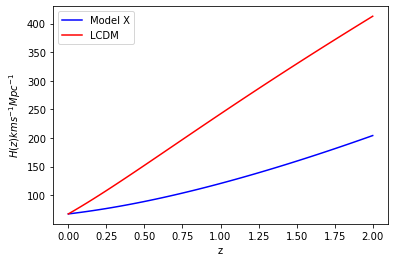

In [105]:
fig1=plt.figure()
plt.plot(zbin,Hzbin, color='blue',label='Model X')
plt.plot(zbin,HzLCDMbin, color='red',label='LCDM')
plt.xlabel('z')
plt.ylabel('$H(z) km s^{-1} Mpc^{-1}$')
plt.legend()
fig1.savefig("Hz.pdf")

In [29]:
Dcbin=np.zeros(bins)
for i in range(len(zbin)):
    Dcbin[i]=Dc(zbin[i],*par)

Graficamos la distancia comóvil como función de z

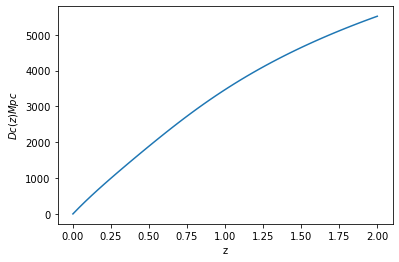

In [30]:
fig1=plt.figure()
plt.plot(zbin,Dcbin)
plt.xlabel('z')
plt.ylabel('$Dc(z) Mpc$')
plt.show()
fig1.savefig("DC.pdf")

In [31]:
DAbin=np.zeros(bins)
for i in range(len(zbin)):
    DAbin[i]=DA(zbin[i],*par)

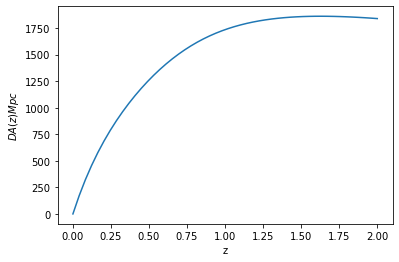

In [32]:
fig2=plt.figure()
plt.plot(zbin,DAbin)
plt.xlabel('z')
plt.ylabel('$DA(z) Mpc$')
plt.show()
fig2.savefig("DA.pdf")

In [33]:
DLbin=np.zeros(bins)
for i in range(len(zbin)):
    DLbin[i]=DL(zbin[i],*par)

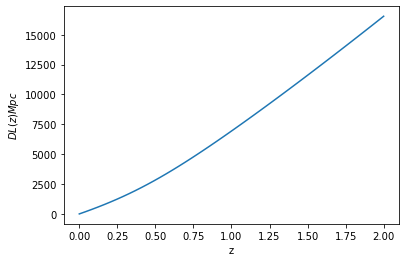

In [34]:
fig3=plt.figure()
plt.plot(zbin,DLbin)
plt.xlabel('z')
plt.ylabel('$DL(z) Mpc$')
plt.show()
fig3.savefig("DL.pdf")

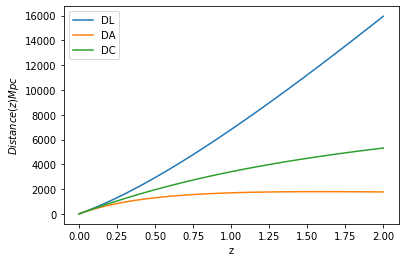

In [175]:
fig4=plt.figure()
plt.plot(zbin,DLbin, label='DL')
plt.plot(zbin,DAbin, label='DA')
plt.plot(zbin,Dcbin, label='DC')
plt.xlabel('z')
plt.ylabel('$Distance(z) Mpc$')
plt.legend()
fig4.savefig("Distances.pdf")

In [109]:
data= np.loadtxt('hz_new.dat')

zdat = data[:,0]
H0dat = data[:,1]
sigma = data[:,2]

print(sigma)

[19.6  12.   26.2   8.    4.    5.   29.6   2.65 14.   36.6   6.22  8.4
 14.   17.    3.68  7.8  62.    7.85 13.    6.1   8.    7.   12.   17.
 40.   23.   20.   17.   18.   14.   40.  ]


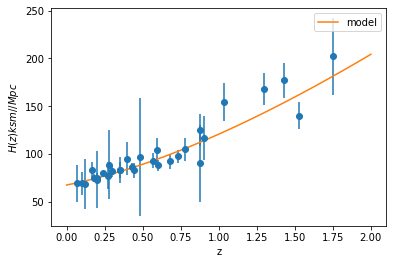

In [110]:
fig5=plt.figure()
plt.errorbar(zdat,H0dat, yerr=sigma,fmt='o')
plt.plot(zbin,Hzbin, label='model')
plt.xlabel('z')
plt.ylabel('$H(z) ksm//Mpc$')
plt.legend()
fig5.savefig("Hwithdata.pdf")

Ahora queremos ajustar los parámetros de un modelo con los datos a través de la Chi-cuadrada

\begin{equation}
\chi^{2}= \sum_{i}^{N} \left(\frac{y_{i}-y_{mod}(\Theta)}{\sigma_{i}}\right)^2
\end{equation}

donde $N$ es el número de datos y $\Theta$ es un vector que contiene $M parámetros libres$

Una prueba de un buen fiteo ('goodness-of-fit') es que $\chi^{2}\approx \nu$ donde $\nu=N-M$ es el número de grados de libertad. Se define la chi-reducida como $\chi_{red}^{2}=\chi^{2}/\nu$. Se tiene que:

\begin{equation}
\chi^{2}_{red}=
\begin{cases}
>1 & \text{ mal ajuste o errores subestimados}  \\
\approx 1 & \text{buen ajuste}\\
<1 & \text{ sobreajuste, errores sobreestimados}\\
\end{cases}
\end{equation}


In [123]:
def ChiHzmodel(*par_free):
    a=0.0
    for i in range(len(zdat)):
        x=(H0dat[i] - par_free[0]*100*Ezmodel(zdat[i],*par_free))/sigma[i]
        a +=pow(x,2.0)
    return a

In [124]:
from scipy.optimize import differential_evolution

In [125]:
fun = lambda parf: ChiHzmodel(parf[0],parf[1],parf[2],parf[3],parf[4],parf[5])  # esta línea es solo para CPL
bounds = [(0.1,0.7), (0.1,.1),(0.1,.6),(1e-6,1e-5),(-3.0,-0.5),(-4.0,4.0)] #esta línea es solo para CPL

result = differential_evolution(fun, bounds)
result.x, result.fun

/home/aldebaran/anaconda3/envs/LENS/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:519: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


(array([ 6.99991561e-01,  1.00000000e-01,  1.92966343e-01,  6.41821356e-06,
        -2.98270400e+00,  1.32893680e-01]),
 15.889275787879686)

In [126]:
from scipy.optimize import minimize

In [127]:
res = minimize(fun, (0.7, 0.05,0.27,1e-5,-1,0), bounds=bounds)

In [128]:
print(res)

      fun: 251.84957494408152
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([3245.73308109,           nan,  532.06603951, 1487.92741186,
        251.97056901, -339.91149166])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 21
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([ 7.0e-01,  1.0e-01,  2.7e-01,  1.0e-05, -1.0e+00,  0.0e+00])


Cambiar $\Omega_{r0}=2.469 \times 10^{-5}h^{-2} (1+0.2271N_{eff})$, donde $N_{eff}=3.04$ es el número de especies relativistas

Selección de modelos


\begin{equation}
{\rm AIC}=\chi^2+2M\;,
\end{equation}

\begin{equation}
{\rm BIC}=\chi^2+M\ln N\;
\end{equation}

Se trabaja con la diferencia entre dos o todos los modelos $\Delta {\rm AIC} \equiv 
{\rm AIC}_2-{\rm AIC}_1$


Evidencia a favor del modelo
\begin{equation}
\Delta_{AIC}=
\begin{cases}
0 - 2 &	\text{ Substantial} \\
4 - 7 &	\text {Considerably less} \\
> 10 & \text {Essentially none} \\
\end{cases}
\end{equation}

Evidencia en contra del modelo
\begin{equation}
\Delta_{BIC}=
\begin{cases}
0 - 2 & \text{ Not worth more than a bare mention} \\
2 - 6 &	\text{ Positive} \\
6 - 10 & \text{ Strong} \\
> 10 & \text{ Very strong} \\
\end{cases}
\end{equation}

